In [11]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import matplotlib

import solvers
from solvers import gaas

ms = solvers.triangular()
ms.num_bands = 2
ms.mesh_size = 8
ms.resolution = 64


def first_tm_gap(r):
    ms.geometry = [mp.Cylinder(r, material=gaas)]
    ms.run_tm()
    return -1 * ms.retrieve_gap(1) # return the gap from TM band 1 to TM band 2


n_ratio = np.linspace(1.4, 3.6, num=20)
opt_radius = np.zeros_like(n_ratio)
opt_gap = np.zeros_like(n_ratio)

for i, ratio in enumerate(n_ratio):
    eps = (3.6/ratio)**2
    ms.default_material = mp.Medium(epsilon=eps)
    result = minimize_scalar(first_tm_gap, method='bounded', bounds=[0.1, 0.5], tol=0.001)
    opt_radius[i] = result.x
    opt_gap[i] = result.fun * -1

/home/adam/Miniconda3-4.4.10-Linux-x86_64/envs/mp/lib/python3.6/site-packages/scipy/optimize/_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
34 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.045454545454545456, 0.0>
  Vector3<0.0, 0.09090909090909091, 0.0>
  Vector3<0.0, 0.13636363636363635, 0.0>
  Vector3<0.0, 0.18181818181818182, 0.0>
  Vector3<0.0, 0.2272727272727273, 0.0>
  Vector3<0.0, 0.2727272727272727, 0.0>
  Vector3<0.0, 0.3181818181818182, 0.0>
  Vector3<0.0, 0.36363636363636365, 0.0>
  Vector3<0.0, 0.4090909090909091, 0.0>
  Vector3<0.0, 0.4545454545454546, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.0303030303030303, 0.48484848484848486, 0.0>
  Vector3<-0.0606060606060606, 0.46969696969696967, 0.0>
  Vector3<-0.0909090909090909, 0.45454545454545453, 0.0>
  Vector3<-0.1212121212121212, 0.4393939393939394, 0.0>
  Vector3<-0.1515151515151515, 0.4242424242424242, 0.0>
  Vector3<-0.1818181818181818, 0.40909090909090906, 0.0>
  Vector3<-0.2121212121212121, 0.3939393939393939, 0.0>
  Vector3<-0.2424242424242424, 0.3787878787878788, 0.0>
  Vector3<-

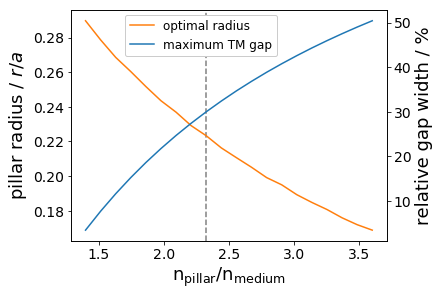

In [30]:
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['legend.fontsize'] = 12

fig, ax_r = plt.subplots(constrained_layout=True)
ax_g = ax_r.twinx()
ax_r.axvline(3.6/1.55, ls='--', alpha=0.5, color='black')
rad_line, = ax_r.plot(n_ratio, opt_radius, color='C1', label='optimal radius')
gap_line, = ax_g.plot(n_ratio, opt_gap, color='C0', label='maximum TM gap')

ax_r.set_xlabel(r'$\mathrm{n_{pillar} / n_{medium}}$')
ax_g.set_ylabel('relative gap width / %')
ax_r.set_ylabel(r'pillar radius / $r/a$')

ax_g.legend(handles=[rad_line, gap_line], loc=(0.17, 0.8), framealpha=1.)
fig.savefig('optimal_radius_and_gap.pdf')

#plt.legend(loc='upper center')
#plt.show()